In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

training_df = pd.read_json('drive/MyDrive/CS412_project/training-dataset.jsonl', lines=True)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
training_df.head()

,profile,posts
0,"{'username': 'deparmedya', 'id': '3170700063',...",[{'caption': 'Cumhuriyetimizin 100.yılı kutlu ...
1,"{'username': 'beyazyakaliyiz', 'id': '86344574...",[{'caption': 'Bu diyaloğun yaşanmadığı bir onl...
2,"{'username': 'kafesfirin', 'id': '266439571', ...",[{'caption': 'Bugün bir fincan köpüklü Türk ka...
3,"{'username': 'vimerang', 'id': '2367195567', '...",[{'caption': 'Saygı ve özlemle🖤 #atatürk #10k...
4,"{'username': 'totalenergies_istasyonlari', 'id...",[{'caption': 'Başöğretmenimiz Gazi Mustafa Kem...


In [ ]:
profiles_training_df = training_df['profile'].apply(pd.Series)
pd.set_option('display.max_columns', None)
profiles_training_df = profiles_training_df[[
    'username',
    'full_name',
    'biography',
    'follower_count',
    'following_count',
    'is_business_account',
    'is_verified',
    'highlight_reel_count',
    'hide_like_and_view_counts',
    'is_professional_account',
    'business_category_name',
    'category_enum',
    'should_show_public_contacts'
    ]]

profiles_training_df['biography'] = profiles_training_df['biography'].fillna('')
profiles_training_df['full_name'] = profiles_training_df['full_name'].fillna('')
profiles_training_df['business_category_name'] = profiles_training_df['business_category_name'].fillna('None')
profiles_training_df['category_enum'] = profiles_training_df['category_enum'].fillna('NONE')

profiles_training_df

,username,full_name,biography,follower_count,following_count,is_business_account,is_verified,highlight_reel_count,hide_like_and_view_counts,is_professional_account,business_category_name,category_enum,should_show_public_contacts
0,deparmedya,Depar Medya,#mediaplanning #mediabuying #sosyalmedya,1167,192,True,False,6,False,True,None,LOCAL,True
1,beyazyakaliyiz,Selam Beyaz Yakalı,Beyaz yakalıların dünyasına hoşgeldiniz 😀😀😀,1265,665,True,False,0,False,True,None,PERSONAL_BLOG,True
2,kafesfirin,KAFES FIRIN,📍Söğütözü📍FTZ AVM\n🛒Ankara macro▲center v...,11997,17,True,False,15,False,True,None,BRAND,True
3,vimerang,Vimerang,Dijital İletişim Yönetimi🎬info@vimerang.comq,2321,454,True,False,11,True,True,Creators & Celebrities,VIDEO_CREATOR,True
4,totalenergies_istasyonlari,TotalEnergies İstasyonları,TotalEnergies İstasyonları resmi Instagram hes...,28025,4,True,False,10,False,True,None,ENERGY_COMPANY,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,herbisiatolye,HERBİŞİ BİTKİ ATÖLYESİ,🌱 Şifalı Bitkiler Atölyesi 🌾\n📲 WhatsApp Sipar...,11805,2561,True,False,13,False,True,None,HEALTH_BEAUTY,True
5411,nestleturkiye,Nestlé Türkiye,"117 YILDIR YUVAMIZ TÜRKİYE! \n5 fabrikamız, 30...",10904,0,True,True,4,False,True,None,FOOD_COMPANY,True
5412,tariszeytinyagi,Tariş Zeytinyağı,,9268,0,True,False,8,True,True,General Interest,ACTIVITY_GENERAL,True
5413,iklim_ce,İklimce,👇👇İklimce Sohbetler’le ilgili her şey,3443,24,False,False,6,False,True,None,NONE,True


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english') + nltk.corpus.stopwords.words('turkish')

vectorizer = TfidfVectorizer(stop_words=stopwords, token_pattern=r'(?u)\b[^\W\d_]{3,}\b', max_features=1000)
tfid_matrix = vectorizer.fit_transform(profiles_training_df['biography'])
vectorized_bio_df = pd.DataFrame(
    tfid_matrix.toarray(),
    columns=['biography.' + col for col in vectorizer.get_feature_names_out()]
)

profiles_training_df = profiles_training_df.join(vectorized_bio_df)

business_category_label_encoder = LabelEncoder()
business_category_label_encoder.fit(list(profiles_training_df['business_category_name']))
profiles_training_df['encoded_business_category'] = business_category_label_encoder.transform(profiles_training_df['business_category_name'])

category_label_encoder = LabelEncoder()
category_label_encoder.fit(list(profiles_training_df['category_enum']))
profiles_training_df['encoded_category'] = category_label_encoder.transform(profiles_training_df['category_enum'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
training_pairs_df = pd.read_csv('drive/MyDrive/CS412_project/train-classification.csv')
training_pairs_df.columns = ['username', 'label']
training_pairs_df['label'] = training_pairs_df['label'].replace('Health and lifestyle', 'Health and Lifestyle')

training_pairs_df = training_pairs_df[training_pairs_df['username'].isin(profiles_training_df['username'])]
label_encoder = LabelEncoder()
label_encoder.fit(list(training_pairs_df['label']))
training_pairs_df['encoded_label'] = label_encoder.transform(training_pairs_df['label'])

merged = pd.merge(profiles_training_df, training_pairs_df, on='username', how='inner')

X_train = merged.drop(columns=['username', 'full_name', 'biography', 'business_category_name', 'category_enum', 'label', 'encoded_label'])
y_train = merged['encoded_label']

X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': list(range(100, 201, 10)),
    'max_features': list(range(1, 21))
}

random_forest = RandomForestClassifier(random_state=0, n_estimators=10, criterion='entropy')

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train1, y_train1)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Accuracy: 0.14274128142741282

Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.04      0.06       169
           1       0.11      0.04      0.06       290
           2       0.17      0.11      0.13       270
           3       0.12      0.03      0.04       450
           4       0.01      0.18      0.02        11
           5       0.19      0.03      0.05       455
           6       0.11      0.04      0.05       138
           7       0.18      0.03      0.05       109
           8       0.16      0.86      0.26       313
           9       0.25      0.01      0.02       261

    accuracy                           0.14      2466
   macro avg       0.14      0.14      0.07      2466
weighted avg       0.16      0.14      0.08      2466



Training accuracy: 93.71%


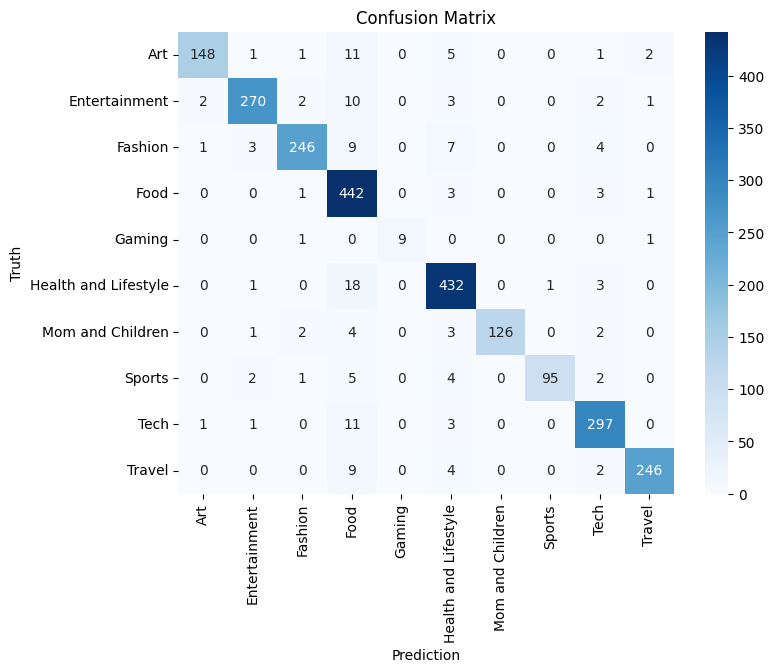

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

random_forest = grid_search.best_estimator_

y_pred1 = random_forest.predict(X_train1)
accuracy = accuracy_score(y_train1, y_pred1)
print(f"Training accuracy: { round(accuracy * 100, 2)}%")

cm = confusion_matrix(y_train1, y_pred1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

Test accuracy: 40.36%


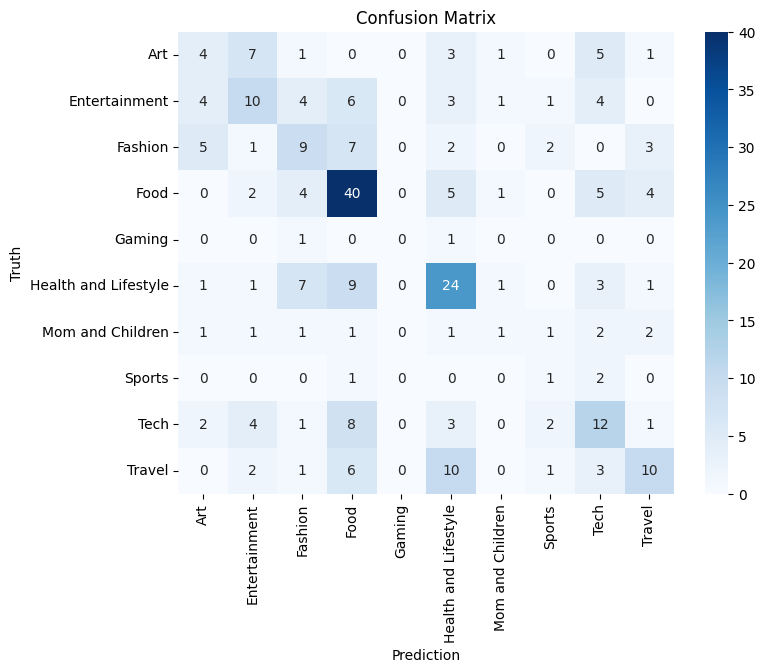

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

random_forest = grid_search.best_estimator_

y_pred2 = random_forest.predict(X_train2)
accuracy = accuracy_score(y_train2, y_pred2)
print(f"Test accuracy: { round(accuracy * 100, 2)}%")

cm = confusion_matrix(y_train2, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
test_usernames_df = pd.read_csv('drive/MyDrive/CS412_project/test-classification-round1.dat', header=None)
test_usernames_df.columns=['username']
test_usernames_df

merged = pd.merge(profiles_training_df, test_usernames_df, on='username', how='inner')
X_test = merged.drop(columns=['username', 'full_name', 'biography', 'business_category_name', 'category_enum'])

y_pred3 = random_forest.predict(X_test)

merged["predicted_label"] = label_encoder.inverse_transform(y_pred3)

results = merged[['username', 'predicted_label']]

In [ ]:
data_dict = dict(zip(results.iloc[:, 0], results.iloc[:, 1]))

import json

with open('drive/MyDrive/CS412_project/classification_output_round1.json', 'w') as f:
  json.dump(data_dict, f, indent=4)

In [ ]:
result = []
for idx, row in training_df.iterrows():
  for dct in row['posts']:
    result.append(dct)

posts_training_df = pd.DataFrame(result)
posts_training_df = posts_training_df[['caption', 'comments_count', 'like_count', 'media_type']]
posts_training_df['caption'] = posts_training_df['caption'].fillna('')
posts_training_df = posts_training_df.dropna(subset=['like_count'])
posts_training_df = posts_training_df.iloc[::10, :]
posts_training_df = posts_training_df.reset_index(drop=True)
posts_training_df = posts_training_df[posts_training_df['like_count'] < 1000]
posts_training_df = posts_training_df.reset_index(drop=True)

<ipython-input-83-4ba55a4d835f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_training_df['caption'] = posts_training_df['caption'].fillna('')


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords

posts_training_df[posts_training_df['like_count'] < 1000]
posts_training_df = posts_training_df.reset_index(drop=True)

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english') + nltk.corpus.stopwords.words('turkish')

vectorizer = TfidfVectorizer(stop_words=stopwords, token_pattern=r'(?u)\b[^\W\d_]{3,}\b', max_features=1000)
tfid_matrix = vectorizer.fit_transform(posts_training_df['caption'])
vectorized_cap_df = pd.DataFrame(
    tfid_matrix.toarray(),
    columns=['caption.' + col for col in vectorizer.get_feature_names_out()]
)

posts_training_df = posts_training_df.join(vectorized_cap_df)
posts_training_df = posts_training_df.drop(columns='caption')

media_type_label_encoder = LabelEncoder()
media_type_label_encoder.fit(list(posts_training_df['media_type']))
posts_training_df['encoded_media_type'] = media_type_label_encoder.transform(posts_training_df['media_type'])
posts_training_df = posts_training_df.drop(columns='media_type')

posts_training_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


comments_count  like_count  caption.adana  caption.adet  caption.adres  \
0                   0         6.0            0.0           0.0            0.0   
1                   0        26.0            0.0           0.0            0.0   
2                   1        11.0            0.0           0.0            0.0   
3                   0         9.0            0.0           0.0            0.0   
4                   1        10.0            0.0           0.0            0.0   
...               ...         ...            ...           ...            ...   
15071               0        33.0            0.0           0.0            0.0   
15072               0        19.0            0.0           0.0            0.0   
15073               0        30.0            0.0           0.0            0.0   
15074               0        31.0            0.0           0.0            0.0   
15075               2        79.0            0.0           0.0            0.0   

       caption.adım  caption.adına  caption.afiyet  caption.ahmet  \
0               0.0            0.0             0.0            0.0   
1               0.0            0.0             0.0            0.0   
2               0.0            0.0             0.0            0.0   
3               0.0            0.0             0.0            0.0   
4               0.0            0.0             0.0            0.0   
...             ...            ...             ...            ...   
15071           0.0            0.0             0.0            0.0   
15072           0.0            0.0             0.0            0.0   
15073           0.0            0.0             0.0            0.0   
15074           0.0            0.0             0.0            0.0   
15075           0.0            0.0             0.0            0.0   

       caption.aile  caption.ailesi  caption.ait  caption.akşam  \
0               0.0             0.0          0.0            0.0   
1               0.0             0.0          0.0            0.0   
2               0.0             0.0          0.0            0.0   
3               0.0             0.0          0.0            0.0   
4               0.0             0.0          0.0            0.0   
...             ...             ...          ...            ...   
15071           0.0             0.0          0.0            0.0   
15072           0.0             0.0          0.0            0.0   
15073           0.0             0.0          0.0            0.0   
15074           0.0             0.0          0.0            0.0   
15075           0.0             0.0          0.0            0.0   

       caption.alabilirsiniz  caption.alan  caption.alanda  caption.alanı  \
0                        0.0           0.0             0.0            0.0   
1                        0.0           0.0             0.0            0.0   
2                        0.0           0.0             0.0            0.0   
3                        0.0           0.0             0.0            0.0   
4                        0.0           0.0             0.0            0.0   
...                      ...           ...             ...            ...   
15071                    0.0           0.0             0.0            0.0   
15072                    0.0           0.0             0.0            0.0   
15073                    0.0           0.0             0.0            0.0   
15074                    0.0           0.0             0.0            0.0   
15075                    0.0           0.0             0.0            0.0   

       caption.alanında  caption.aldı  caption.aldığı  caption.ali  \
0                   0.0           0.0             0.0          0.0   
1                   0.0           0.0             0.0          0.0   
2                   0.0           0.0             0.0          0.0   
3                   0.0           0.0             0.0          0.0   
4                   0.0           0.0             0.0          0.0   
...                 ...           ...             ...  

In [ ]:
from sklearn.model_selection import train_test_split

X = posts_training_df.drop(columns='like_count')
y = posts_training_df['like_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [90, 100],
    'max_features': [9, 10]
}

model = RandomForestRegressor()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .......................max_depth=90, max_features=9; total time=   4.0s
[CV] END .......................max_depth=90, max_features=9; total time=   4.0s
[CV] END .......................max_depth=90, max_features=9; total time=   9.7s
[CV] END ......................max_depth=90, max_features=10; total time=   7.7s
[CV] END ......................max_depth=90, max_features=10; total time=   8.2s
[CV] END ......................max_depth=90, max_features=10; total time=   4.6s
[CV] END ......................max_depth=100, max_features=9; total time=   6.7s
[CV] END ......................max_depth=100, max_features=9; total time=   7.9s
[CV] END ......................max_depth=100, max_features=9; total time=   6.2s
[CV] END .....................max_depth=100, max_features=10; total time=   6.5s
[CV] END .....................max_depth=100, max_features=10; total time=   4.6s
[CV] END .....................max_depth=100, max_

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

model = grid_search.best_estimator_

y_pred = model.predict(X_train)
train_error = mae(y_train, y_pred)
y_pred = model.predict(X_test)
test_error = mae(y_test, y_pred)
print(train_error)
print(test_error)
print(y_pred)
y_train

67.21689730246963
96.04191613415463
[ 97.34883719  69.35792889  73.24697205 ...  72.24502991 193.70287688
 212.12115953]


,like_count
8574,304.0
5547,14.0
9499,513.0
10815,19.0
10225,37.0
...,...
13123,2.0
3264,226.0
9845,854.0
10799,60.0


In [ ]:
df = pd.read_json('drive/MyDrive/CS412_project/test-regression-round1.jsonl', lines=True)
df

,caption,comments_count,id,media_type,media_url,timestamp,username
0,"KOZA 2023 2.si Damla’nın koleksiyonu, Latinced...",2,18144550534306740,CAROUSEL_ALBUM,https://scontent-sof1-1.cdninstagram.com/v/t51...,2023-11-02 15:49:22,kozayarismasi
1,Tüm Türkiye ve Avrupa’ya sevkiyatlarımız aralı...,0,17995331788956692,VIDEO,https://scontent-sof1-2.cdninstagram.com/o1/v/...,2023-08-19 13:46:02,celikbeymobilya
2,🤩\n\n.\n.\nDaha Fazlası İçin Beğenmeyi ve Taki...,75,18302703232191520,VIDEO,None,2023-10-02 06:53:33,girisimci_muhendis
3,En taze mezelerin en keyifli masalarda buluştu...,1,17908564031282980,IMAGE,https://scontent-sof1-1.cdninstagram.com/v/t51...,2022-01-31 12:02:05,levanteculina
4,Psikolojik güvenliği kısaca herhangi bir takım...,0,17952070292635946,IMAGE,https://scontent-sof1-2.cdninstagram.com/v/t51...,2023-06-30 08:46:05,acmagile
...,...,...,...,...,...,...,...
2995,"Gün sonu keyfi için Ülker Çikolata kalmadıysa,...",3,17979354992109136,VIDEO,https://scontent-sof1-2.cdninstagram.com/o1/v/...,2023-04-11 17:31:36,ulkercikolata
2996,"Kızlarımmm, Nia Çağlayan, İdil, Ada…🧿🧿🧿",210,17978532730614308,IMAGE,https://scontent-sof1-1.cdninstagram.com/v/t51...,2022-08-07 18:29:28,mcengizbozkurt
2997,Bölgesel Kalkınma Dergisi’nin üçüncü sayısı ya...,0,18283042996145000,IMAGE,https://scontent-sof1-1.cdninstagram.com/v/t51...,2023-10-03 08:06:16,izmirkalkinma
2998,NaN,0,17923665953796916,CAROUSEL_ALBUM,https://scontent-sof1-2.cdninstagram.com/v/t51...,2023-11-14 09:26:45,esqtekstil


In [ ]:
X_test = df[['caption', 'comments_count', 'media_type']]
X_test['caption'] = X_test['caption'].fillna('')
X_test = X_test.reset_index(drop=True)

tfid_matrix = vectorizer.transform(X_test['caption'])
vectorized_cap_df = pd.DataFrame(
    tfid_matrix.toarray(),
    columns=['caption.' + col for col in vectorizer.get_feature_names_out()]
)

X_test = X_test.join(vectorized_cap_df)
X_test = X_test.drop(columns='caption')

media_type_label_encoder = LabelEncoder()
media_type_label_encoder.fit(list(X_test['media_type']))
X_test['encoded_media_type'] = media_type_label_encoder.transform(X_test['media_type'])
X_test = X_test.drop(columns='media_type')

X_test

<ipython-input-85-40ad2aef9782>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['caption'] = X_test['caption'].fillna('')


comments_count  caption.adana  caption.adet  caption.adres  \
0                  2            0.0           0.0            0.0   
1                  0            0.0           0.0            0.0   
2                 75            0.0           0.0            0.0   
3                  1            0.0           0.0            0.0   
4                  0            0.0           0.0            0.0   
...              ...            ...           ...            ...   
2995               3            0.0           0.0            0.0   
2996             210            0.0           0.0            0.0   
2997               0            0.0           0.0            0.0   
2998               0            0.0           0.0            0.0   
2999               0            0.0           0.0            0.0   

      caption.adım  caption.adına  caption.afiyet  caption.ahmet  \
0              0.0            0.0             0.0            0.0   
1              0.0            0.0             0.0            0.0   
2              0.0            0.0             0.0            0.0   
3              0.0            0.0             0.0            0.0   
4              0.0            0.0             0.0            0.0   
...            ...            ...             ...            ...   
2995           0.0            0.0             0.0            0.0   
2996           0.0            0.0             0.0            0.0   
2997           0.0            0.0             0.0            0.0   
2998           0.0            0.0             0.0            0.0   
2999           0.0            0.0             0.0            0.0   

      caption.aile  caption.ailesi  caption.ait  caption.akşam  \
0              0.0             0.0          0.0            0.0   
1              0.0             0.0          0.0            0.0   
2              0.0             0.0          0.0            0.0   
3              0.0             0.0          0.0            0.0   
4              0.0             0.0          0.0            0.0   
...            ...             ...          ...            ...   
2995           0.0             0.0          0.0            0.0   
2996           0.0             0.0          0.0            0.0   
2997           0.0             0.0          0.0            0.0   
2998           0.0             0.0          0.0            0.0   
2999           0.0             0.0          0.0            0.0   

      caption.alabilirsiniz  caption.alan  caption.alanda  caption.alanı  \
0                       0.0      0.000000             0.0            0.0   
1                       0.0      0.000000             0.0            0.0   
2                       0.0      0.000000             0.0            0.0   
3                       0.0      0.000000             0.0            0.0   
4                       0.0      0.000000             0.0            0.0   
...                     ...           ...             ...            ...   
2995                    0.0      0.000000             0.0            0.0   
2996                    0.0      0.000000             0.0            0.0   
2997                    0.0      0.120267             0.0            0.0   
2998                    0.0      0.000000             0.0            0.0   
2999                    0.0      0.000000             0.0            0.0   

      caption.alanında  caption.aldı  caption.aldığı  caption.ali  \
0                  0.0           0.0             0.0          0.0   
1                  0.0           0.0             0.0          0.0   
2                  0.0           0.0             0.0          0.0   
3                  0.0           0.0             0.0          0.0   
4                  0.0           0.0             0.0          0.0   
...                ...           ...             ...          ...   
2995               0.0           0.0             0.0          0.0   
2996               0.0           0.0             0.0          0.0   
2997               0.0           0.0         

In [ ]:
y_pred = model.predict(X_test)

df['predicted_likes'] = y_pred
df = df[['id', 'predicted_likes']]

In [ ]:
data_dict = dict(zip(df.iloc[:, 0], df.iloc[:, 1]))
import json

with open('drive/MyDrive/CS412_project/regression_output_round1.json', 'w') as f:
  json.dump(data_dict, f, indent=4)